In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from scipy.stats import stats
from IPython.display import display
import pymc3 as pm
import statsmodels.api as sm
import theano.tensor as tt
import seaborn as sns
from ipywidgets import interact
import arviz as az

%load_ext autoreload
%autoreload 2
%matplotlib inline

cwd = os.getcwd()

In [5]:
# get the top 50 bike ids from the first dataset
bike_id_top_50 = pd.read_csv(os.path.join(
    cwd, "Citibike_Aggregate", "GroupBy_bikeid_Seconds_Distance.csv")).loc[:, "Bike ID"].values[:50]
bike_id_top_50

array([30503, 30875, 16777, 18504, 16533, 19957, 15336, 30446, 33252,
       27076, 18223, 25111, 27183, 21523, 27128, 24939, 17655, 31347,
       19422, 16355, 20999, 27556, 28721, 28287, 19903, 15356, 25220,
       17548, 17607, 18251, 15411, 25788, 26820, 31498, 31807, 27927,
       27452, 17546, 27789, 17094, 27578, 27808, 32036, 28340, 28653,
       15795, 20145, 28849, 26852, 31809], dtype=int64)

In [7]:
# get the data summarized
df = pd.read_csv(os.path.join(cwd, "Citibike_Aggregate",
                           "GroupBy_Year_Month_Day_Hour_top50_bikeid_Seconds_Distance.csv"))
df.head()

,Start Year,Start Month,Start Day,Start Hour,Bike ID,Duration_Seconds_SUM,Duration_Seconds_COUNT,Station_Distance_SUM,Station_Distance_COUNT
0,2017,1,1,0,15336,0,0,1,0
1,2017,1,1,0,15356,0,0,1,0
2,2017,1,1,0,15411,0,0,1,0
3,2017,1,1,0,15795,0,0,1,0
4,2017,1,1,0,16355,0,0,1,0


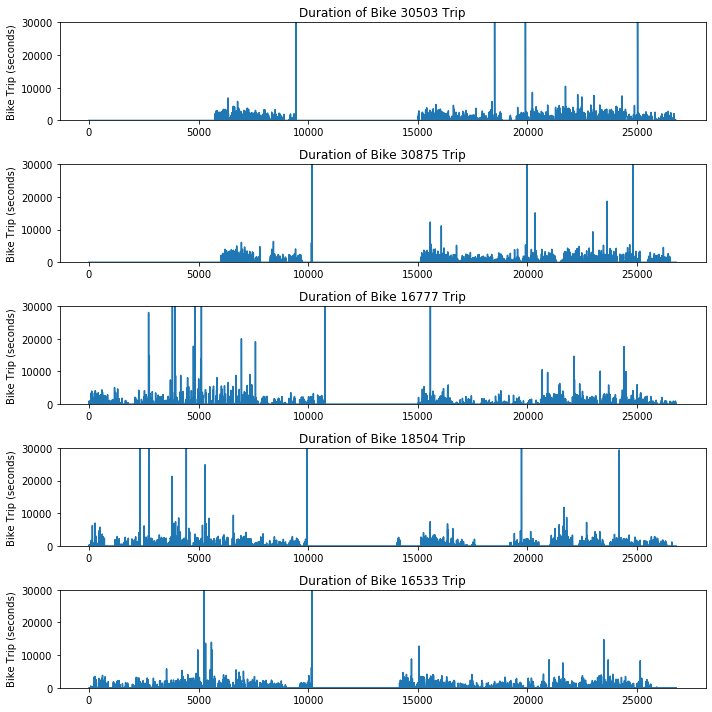

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,10))

for x in range(5):
    df_temp = df.loc[df["Bike ID"] == bike_id_top_50[x], "Duration_Seconds_SUM"].reset_index(drop=True)
    axes[x].plot(df_temp)
    axes[x].set_ylim(0, 30_000)
    axes[x].set_title(f"Duration of Bike {bike_id_top_50[x]} Trip")
    axes[x].set_ylabel("Bike Trip (seconds)")
    fig.tight_layout()
fig.savefig(os.path.join("images", "Top 5 CitiBike Bikes by IDs Durations.png"))

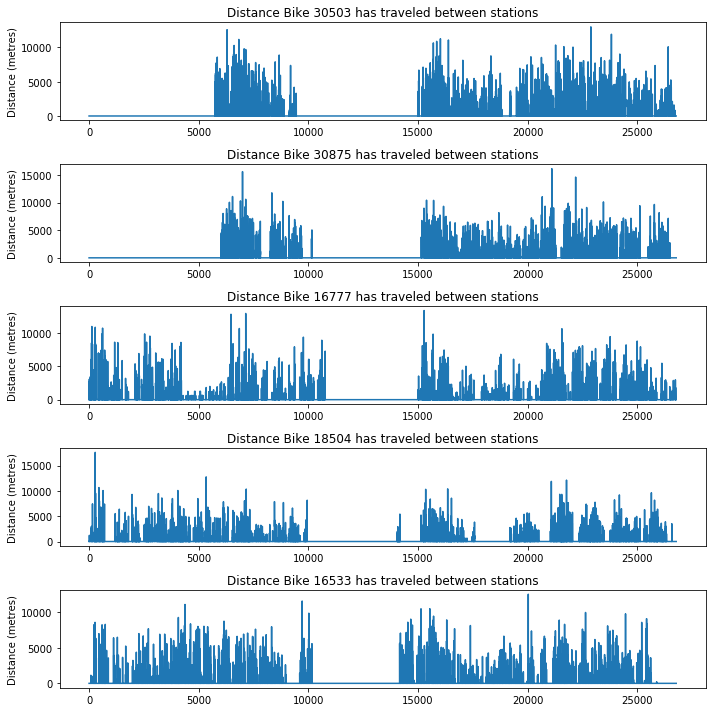

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,10))

for x in range(5):
    df_temp = df.loc[df["Bike ID"] == bike_id_top_50[x], "Station_Distance_SUM"].reset_index(drop=True)
    axes[x].plot(df_temp)
    axes[x].set_title(f"Distance Bike {bike_id_top_50[x]} has traveled between stations")
    axes[x].set_ylabel("Distance (metres)")
    fig.tight_layout()
fig.savefig(os.path.join("images", "Top 5 CitiBike Bikes by IDs Distance.png"))